In [1]:
from sklearn.model_selection import train_test_split
import mglearn.datasets as mg_datasets

X, y = mg_datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [2]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [3]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
print(clf.predict(X_test))
print(y_test)

[1 0 1 0 1 0 0]
[1 0 1 0 1 1 0]


In [5]:
import numpy as np

print(np.mean(clf.predict(X_test) == y_test))


0.8571428571428571


In [6]:
print(clf.score(X_test, y_test))

0.8571428571428571


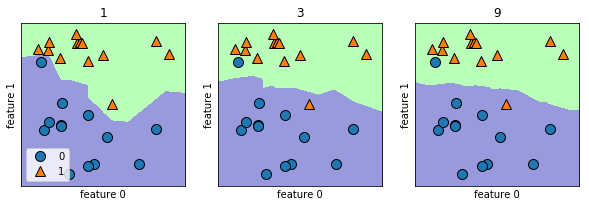

In [7]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(n_neighbors)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


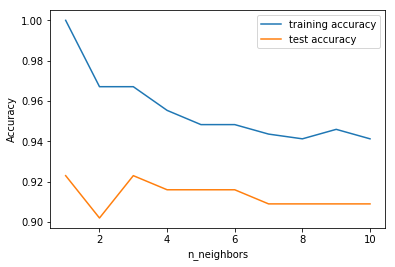

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练集精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

print(training_accuracy)
print(test_accuracy)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

w[0]: 0.393906  b: -0.031804


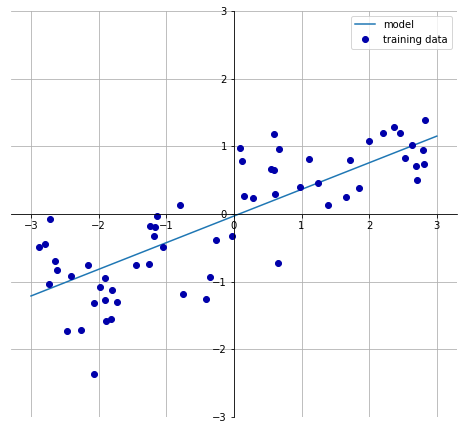

In [9]:
mglearn.plots.plot_linear_regression_wave()

In [10]:
from sklearn.linear_model import LinearRegression

X, y = mg_datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [11]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [12]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


In [13]:
X, y = mg_datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9523526436864238
0.6057754892935391


In [14]:
# 岭回归
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8860578560395836
0.7527139600306945


In [15]:
ridge1 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge1.score(X_train, y_train))
print(ridge1.score(X_test, y_test))

0.9285782082010733
0.7717933688844973
